In [5]:
import numpy as np
from sklearn.datasets import make_classification

In [6]:
X,y = make_classification(n_samples=100,
                        n_features=2,
                        n_informative=1,
                        n_redundant=0,
                        n_classes=2,
                        n_clusters_per_class=1,
                        hypercube=False,
                        random_state=41,
                        class_sep=20)

In [83]:
X.shape, y.shape

((100, 2), (100,))

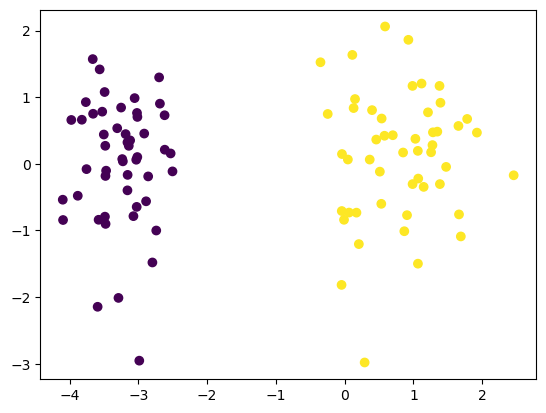

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def step(z):
    return 1 if z > 0 else 0

In [10]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    epochs = 1000
    lr = 0.01
    for i in range(epochs):
        point = np.random.randint(0,X.shape[0])
        y_hat = step(np.dot(X[point],weights))
        weights = weights + lr * (y[point] - y_hat) * X[point]
    return weights[1:],weights[0]

In [11]:
w,b = perceptron(X,y)

In [12]:
w,b

(array([1.01038703, 0.68745624]), 1.1400000000000001)

In [13]:
m = -w[0]/w[1]
c = -b/w[1]

(-4.0, 4.0)

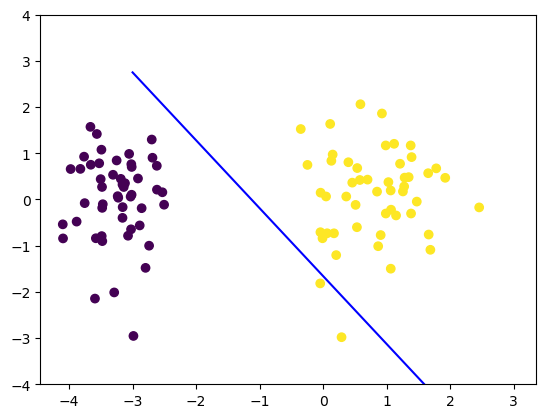

In [14]:
x_in = np.linspace(-3,3,100)
y_in_percep = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_percep,c='blue')
plt.ylim(-4,4)

Implementng using sigmoid

In [15]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    epochs = 1000
    lr = 0.01
    for i in range(epochs):
        point = np.random.randint(0,X.shape[0])
        y_hat = sigmoid(np.dot(X[point],weights))
        weights = weights + lr * (y[point] - y_hat) * X[point]
    return weights[1:],weights[0]

In [16]:
w,b = perceptron(X,y)
w,b

(array([1.81109003, 0.5109504 ]), 1.4107918202971101)

In [17]:
m = -w[0]/w[1]
c = -b/w[1]

(-4.0, 4.0)

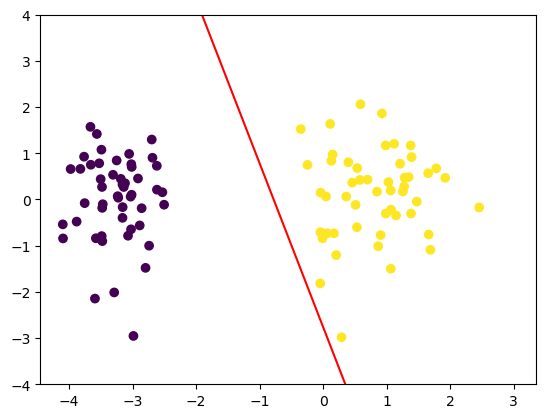

In [18]:
x_in = np.linspace(-3,3,100)
y_in_sig = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_sig,c='red')
plt.ylim(-4,4)

Now, lets use sklearn's LogisticRegression model and see

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X,y)
w = lr.coef_
b = lr.intercept_
w,b

(array([[2.36679363, 0.02300492]]), array([3.13571596]))

In [21]:
m = -w[0][0]/w[0][1]
c = -b/w[0][1]

(-4.0, 4.0)

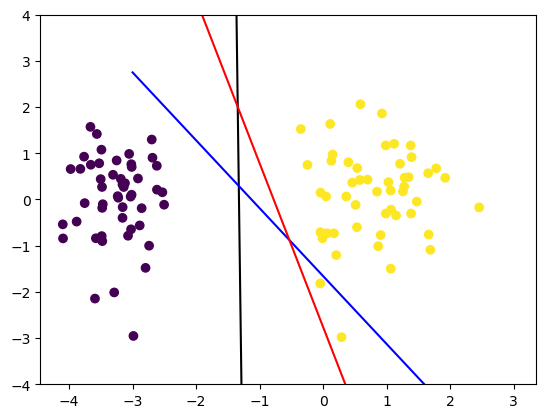

In [22]:
x_in = np.linspace(-3,3,100)
y_in_lr = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_lr,c='black')
plt.plot(x_in,y_in_percep,c = 'blue')
plt.plot(x_in,y_in_sig,c='red')
plt.ylim(-4,4)

Here we see that sigmoid (red) has made some improvement over the the normal perceptron trick (blue), but sill is far from what the actual LogisticRegression has implemented

### Gradient Descent

Now to do what the LogisticReg class has done to get good results, we'll use Gradient descent

In [122]:
class MyLogReg:
    def __init__(self,epochs = 1000,lr = 0.01):
        self.epochs = epochs
        self.lr = lr
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        m = X_train.shape[0]
        n = X_train.shape[1] if len(X_train.shape) > 1 else 1
        weights = np.random.rand(n+1,1)
        X_train = np.insert(X_train,0,1,axis=1)
        y_train = y_train.reshape(-1,1)
        for i in range(self.epochs):
            y_hat = sigmoid(np.matmul(X_train,weights))
            weights = weights + (self.lr * np.matmul(X_train.T,(y_train - y_hat)) / m)
        self.weights = weights[1:]
        self.bias = weights[0]
    
    def predict(self,X_test):
        return sigmoid(np.dot(X_test,self.weights) + self.bias)


In [130]:
logReg = MyLogReg(epochs=5000,lr=0.5)
logReg.fit(X,y)

In [131]:
w = logReg.weights
b = logReg.bias
w,b

(array([[4.83766288],
        [0.21157953]]),
 array([5.83115004]))

In [132]:
m = -w[0].item()/w[1].item()
c = -b/w[1].item()

(-4.0, 4.0)

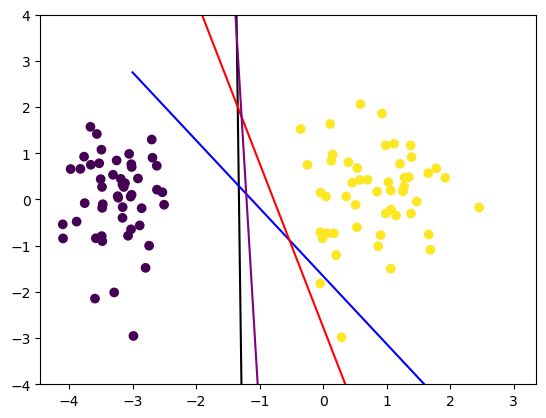

In [133]:
x_in = np.linspace(-3,3,100)
y_in_mylr = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_lr,c='black')
plt.plot(x_in,y_in_percep,c = 'blue')
plt.plot(x_in,y_in_sig,c='red')
plt.plot(x_in,y_in_mylr,c='purple')
plt.ylim(-4,4)

We can see that purple line performs far better that perceptron model and the model with only sigmoid function

Why can't it perform as good as the black line? Because the LogReg of sklearn has some regularization parameters set. If we remove those, we can achieve a similar line

In [134]:
lr = LogisticRegression(penalty=None,solver='sag')
lr.fit(X,y)
w = lr.coef_
b = lr.intercept_
w,b

/home/satya-tt0492/anaconda3/envs/ex5/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([[4.78967615, 0.20840495]]), array([5.75876406]))

In [135]:
m = -w[0][0]/w[0][1]
c = -b/w[0][1]

(-4.0, 4.0)

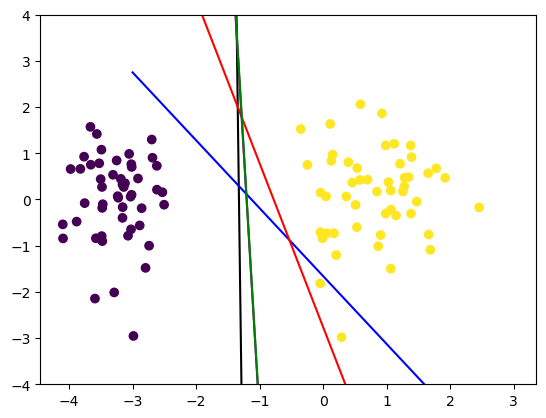

In [136]:
x_in = np.linspace(-3,3,100)
y_in_lr_no_hyperpara = m * x_in + c
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_in,y_in_lr,c='black')
plt.plot(x_in,y_in_percep,c = 'blue')
plt.plot(x_in,y_in_sig,c='red')
plt.plot(x_in,y_in_mylr,c='purple')
plt.plot(x_in,y_in_lr_no_hyperpara,c='green')
plt.ylim(-4,4)

Here we see with no regularizatation hyperparameter in LogReg class(green line) how it just overlaps with our class (purple line) and hence proving the implementation